In [15]:
"""
以下代码参考了 https://www.kaggle.com/mlg-ulb/creditcardfraud 的若干案例
向原作者致谢！
"""
#工作包准备
print('*'*45)
print('工作包准备:')
print('*'*45)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#中文图表显示字体以及坐标轴负号显示设置
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

import matplotlib.gridspec as gridspec
import seaborn as sns; 
plt.style.use('ggplot')

import sklearn
#预处理，对数据做均值和方差归一
from sklearn.preprocessing import StandardScaler
#用于将整个数据集划分成训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#用于输出混淆矩阵
from sklearn.metrics import confusion_matrix

*********************************************
工作包准备:
*********************************************



*********************************************
读入交易数据，显示数据概况:
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V1

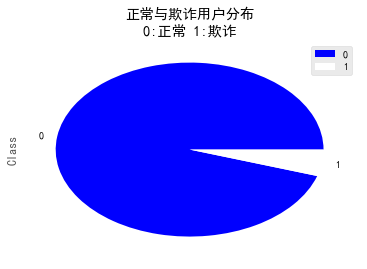

In [25]:
#数据概况
print()
print('*'*45)
print('读入交易数据，显示数据概况:')
print('*'*45)
#crecreditcard_data=pd.read_csv('./Section6 creditcard_small.csv')
FraudDetction=pd.read_csv('Section6 creditcard_small.csv')
FraudDetction.info()
FraudDetction.describe()

# 看看欺诈交易与正常交易的数据量对比
label_distr=pd.value_counts(FraudDetction['Class'],sort=True).sort_index()
# 统计欺诈与正常交易的总数
label_distr.value_counts()
#绘制饼图
label_distr.plot.pie(legend='True',colors=['b','w'],
                 title='正常与欺诈用户分布\n0:正常 1:欺诈')
plt.savefig('ch17_01.png',dpi=300,bbox_inches='tight')
plt.show()

*********************************************
查看正常/欺诈交易发生数量与交易时间的关系:
*********************************************
正常
count     9508.000000
mean      5544.088662
std       4156.817094
min          0.000000
25%       1930.750000
50%       4206.500000
75%       9375.500000
max      14289.000000
Name: Time, dtype: float64
-------------------------
欺诈
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

交易量与时间的关系：



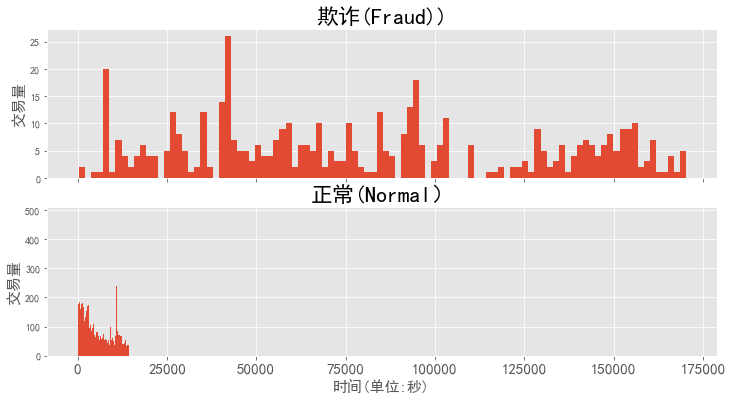

In [26]:
#查看正常/欺诈交易与交易时间的关系
print('*'*45)
print('查看正常/欺诈交易发生数量与交易时间的关系:')
print('*'*45)

# 查看二者的描述性统计,与时间的序列分布关系
print('正常')
print(FraudDetction.Time[FraudDetction.Class == 0].describe())
print('-'*25)
print('欺诈')
print(FraudDetction.Time[FraudDetction.Class == 1].describe())

f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=100

ax1.hist(FraudDetction.Time[FraudDetction.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud))',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(FraudDetction.Time[FraudDetction.Class == 0],bins=bins)
ax2.set_title('正常(Normal）',fontsize=22)
ax2.set_ylabel('交易量',fontsize=15)

plt.xlabel('时间(单位:秒)',fontsize=15)
plt.xticks(fontsize=15)

print()
print('交易量与时间的关系：')
print()
plt.savefig('ch17_02.png',dpi=300,bbox_inches='tight')
plt.show()


*********************************************
查看正常/欺诈交易发生数量与单笔交易金额的关系:
*********************************************
正常
count    9508.000000
mean       63.206293
std       184.811458
min         0.000000
25%         5.000000
50%        15.950000
75%        52.767500
max      7712.430000
Name: Amount, dtype: float64
-------------------------
欺诈
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

交易量与交易金额的关系：


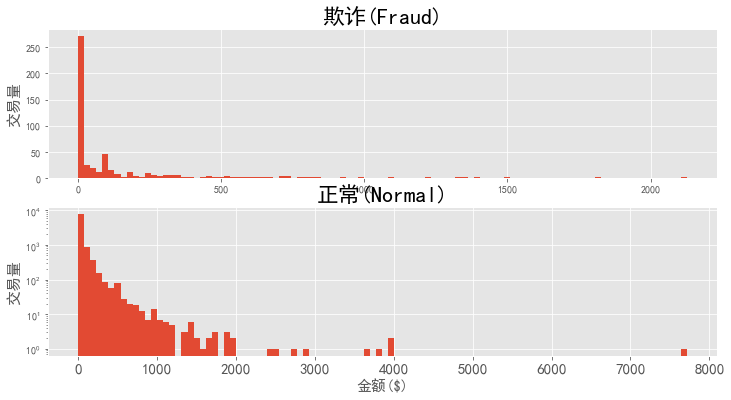

In [27]:
#查看真实/欺诈交易与交易金额的关系
print()
print('*'*45)
print("查看正常/欺诈交易发生数量与单笔交易金额的关系:")
print('*'*45)
# 查看二者的描述性统计,与金额的序列分布关系
print('正常')
print(FraudDetction.Amount[FraudDetction.Class==0].describe())
print('-'*25)
print('欺诈')
print(FraudDetction.Amount[FraudDetction.Class ==1].describe())

f,(ax1,ax2)=plt.subplots(2,1,sharex=False,figsize=(12,6))
bins=100

ax1.hist(FraudDetction.Amount[FraudDetction.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud)',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(FraudDetction.Amount[FraudDetction.Class == 0],bins=bins)
ax2.set_title('正常(Normal)',fontsize=22)
ax2.set_ylabel('交易量',fontsize=15)

plt.xlabel('金额($)',fontsize=15)
plt.xticks(fontsize=15)
#因为金额数据跨度过大，因此y轴调整成对数坐标
plt.yscale('log')

print()
print('交易量与交易金额的关系：')
plt.savefig('ch17_03.png',dpi=300,bbox_inches='tight')
plt.show()


*********************************************
查看正常/欺诈交易在各属性下的分布关系:
*********************************************


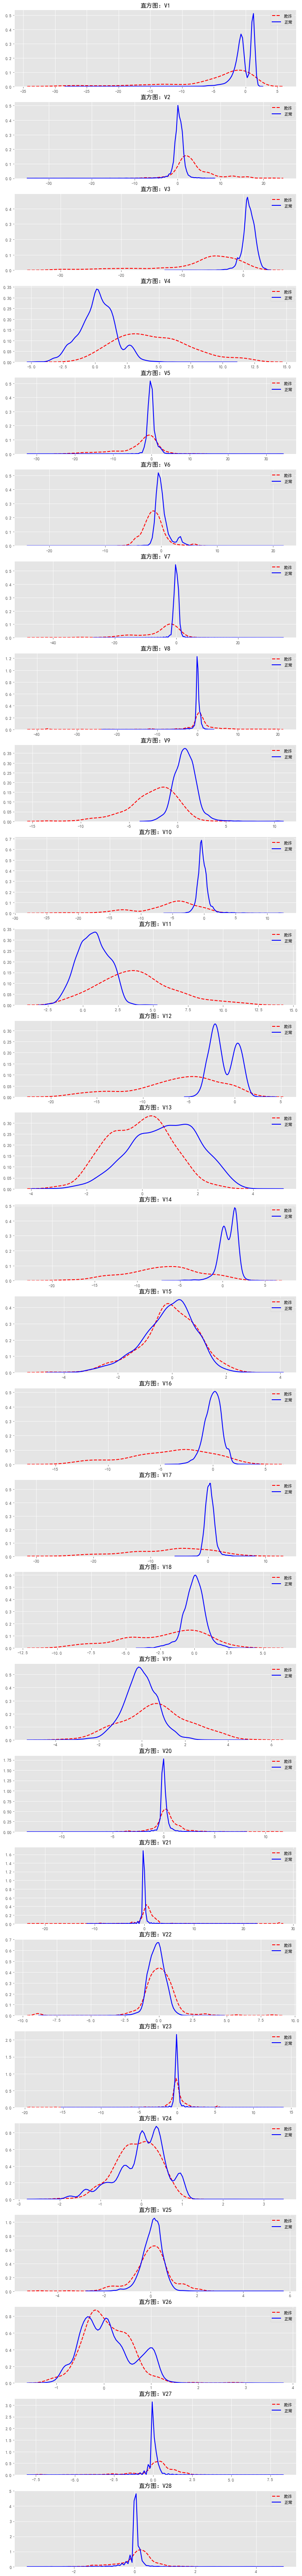

In [28]:
#分别查看28个属性与正常/欺诈的分类标签之间的联系是否紧密
#两个曲线越是趋向一致，说明该属性越难以区分正常或者欺诈交易
#两个曲线越是差别大，说明该属性的取值对正常/欺诈交易的区分越明显
#下列代码输出结果中的“直方图V14”，正常/欺诈交易的分布区别很明显
#而“直方图V15”，正常/欺诈交易的分布就基本重合
print()
print('*'*45)
print('查看正常/欺诈交易在各属性下的分布关系:')
print('*'*45)
v_features=[x for x in FraudDetction.columns 
            if x not in ['Time','Amount','Class']]
plt.figure(figsize=(12,28*4))
gs =gridspec.GridSpec(28,1)

import warnings
warnings.filterwarnings('ignore')

for i,cn in enumerate(FraudDetction[v_features]):
    ax=plt.subplot(gs[i])
    sns.distplot(FraudDetction[cn][FraudDetction.Class==1],
                 hist=False,bins=50,kde=True,label="欺诈",
                 kde_kws={"color": "r", "lw": 2, 'linestyle':'--'},)
    sns.distplot(FraudDetction[cn][FraudDetction.Class==0],
                 hist=False,bins=50,kde=True,label="正常",
                 kde_kws={"color": "b", "lw": 2, 'linestyle':'-'},)
    ax.set_xlabel('')
    ax.set_title('直方图：'+str(cn))
plt.savefig('ch17_04.png',dpi=300,bbox_inches='tight')
plt.show()

In [29]:
#分别调用逻辑回归、随机森林、支持向量SVM三种Scikit内建的模型
#数据按7：3的比例生产训练和测试数据集分组
print()
print('*'*45)
print('模型训练数据准备:')
print('*'*45)
Fraud=FraudDetction[FraudDetction.Class == 1]
Normal=FraudDetction[FraudDetction.Class == 0]

# 训练特征集
x_train=Fraud.sample(frac=0.7)
x_train=pd.concat([x_train,Normal.sample(frac=0.7)],axis=0)
# 测试特征集
x_test=FraudDetction.loc[~FraudDetction.index.isin(x_train.index)]

# 标签集
y_train=x_train.Class
y_test=x_test.Class

# 去掉特征集里的标签和时间列
x_train=x_train.drop(['Class','Time'],axis=1)
x_test=x_test.drop(['Class','Time'],axis=1)
# 查看数据结构
print('训练数据结构：',x_train.shape,y_train.shape)
print('测试数据结构：',x_test.shape,y_test.shape)

#导入日期时间包，用于算法训练时间分析
import datetime


*********************************************
模型训练数据准备:
*********************************************
训练数据结构： (7000, 29) (7000,)
测试数据结构： (3000, 29) (3000,)


In [30]:
#逻辑回归方法
print()
print('*'*45)
print('逻辑回归')
print('*'*45)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_recall_curve,auc,roc_auc_score,
roc_curve,recall_score,classification_report)

#构造逻辑回归模型
lrmodel = LogisticRegression(penalty='l2')
#训练模型
start=datetime.datetime.now()
lrmodel.fit(x_train, y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_lr=lrmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_lr))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_lr)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_lr)))
print('Runtime =',end-start) 


*********************************************
逻辑回归
*********************************************
confusion_matrix
[[2842   10]
 [  10  138]]
Accuracy:0.993333
Area under the curve:0.964463
Runtime = 0:00:00.225195


In [31]:
#随机森林模型
print()
print('*'*45)
print('随机森林')
print('*'*45)
from sklearn.ensemble import RandomForestClassifier

#构造随机森林模型
rfmodel=RandomForestClassifier()
#训练模型
start=datetime.datetime.now()
rfmodel.fit(x_train,y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_rf=rfmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_rf))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_rf)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_rf)))
print('Runtime =',end-start)


*********************************************
随机森林
*********************************************
confusion_matrix
[[2850    2]
 [  13  135]]
Accuracy:0.995000
Area under the curve:0.955730
Runtime = 0:00:04.360175


In [32]:
#支持向量机SVM
print()
print('*'*45)
print('支持向量机SVM')
print('*'*45)
from sklearn.svm import SVC

#构造支持向量机模型
svcmodel=SVC(kernel='sigmoid')
#训练模型
start=datetime.datetime.now()
svcmodel.fit(x_train,y_train)
end=datetime.datetime.now()

#查看混淆矩阵
ypred_svc=svcmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_svc))

#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_svc)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_svc)))
print('Runtime =',end-start)


*********************************************
支持向量机SVM
*********************************************
confusion_matrix
[[2852    0]
 [ 131   17]]
Accuracy:0.956333
Area under the curve:0.557432
Runtime = 0:00:00.284539


In [33]:
#使用训练好的随机森林模型进行预测
#从x_test中抽取一条记录，作为模拟的新输入数据
new_input=x_test.iloc[10].values.reshape(1,-1)
print("new_input=",new_input)
#使用逻辑回归模型对该数据进行预测
print("lrmodel prediction=",lrmodel.predict(new_input))
#使用随机森林模型对该数据进行预测
print("rfmodel prediction=",rfmodel.predict(new_input))
#使用支持向量机模型对该数据进行预测
print("SVCmodel prediction=",svcmodel.predict(new_input))

new_input= [[ -4.71052878   8.63621439 -15.496222    10.31334937  -4.35134098
   -3.32268873 -10.78837284   5.06038112  -5.68931119 -11.71218662
   11.1524906  -16.55819714   0.30264452 -17.47592128  -0.41239327
  -10.22220317 -13.79914764  -5.00858518   1.16202615   1.43423978
    1.99054535   0.223785     0.55440843  -1.2040416   -0.4506846
    0.64183606   1.60595763   0.72164361   1.        ]]
lrmodel prediction= [1]
rfmodel prediction= [1]
SVCmodel prediction= [0]
